# World Happiness Data Analysis

### Introduction 📝

This notebook analyses the *World Happiness dataset* from 2019, and ranks countries based on their happiness score.

**Data Overview**

The dataset contains the following columns:
- Overall rank: The rank of the country based on its happiness score.
- Country or region: The name of the country or region.
- Score: The happiness score of the country.
- GDP per capita: The contribution of GDP (Gross Domestic Product) per capita to the happiness score.
- Social support: The contribution of social support to the happiness score.
- Healthy life expectancy: The contribution of healthy life expectancy to the happiness score.
- Freedom to make life choices: The contribution of freedom to the happiness score.
- Generosity: The contribution of generosity to the happiness score.
- Perceptions of corruption: The contribution of corruption perception to the happiness score.


### Research Questions 🔍

→ **Do richer countries tend to be happier?**

We’ll look at the relationship between *GDP per capita* and *happiness score*.

→ **How are happiness scores distributed across countries?**

Are most countries kind-of-happy, or do we see a big gap between the happiest and least happy countries?

→ **Can we draw a regression line to “predict” happiness from GDP per capita?**

Using *NumPy* and *Matplotlib*, we’ll build a regression model and plot it.


### Data Exploration 🕵️‍♀️


In [ ]:

# Basic info
df.info()


In [ ]:

# Summary statistics for numeric columns
df.describe().T


In [ ]:

# Check for missing values
df.isna().sum()


## Data Visualisations 📊

I started off by importing the libraries I needed, and the dataset for analysis.

- **Top 5 Happiest Countries**


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./2019.csv")
df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


- A **histogram** of happiness scores – how are they spread out across countries?


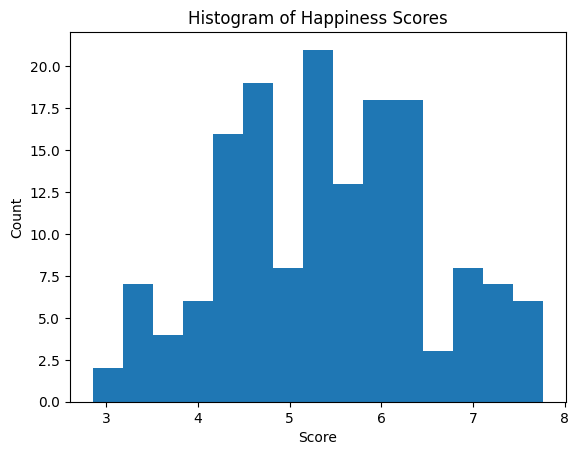

In [2]:

plt.hist(df["Score"], bins=15)
plt.title("Histogram of Happiness Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


## Regression Analysis 📈

> **How strongly is GDP per capita related to happiness?**


Slope: 2.2181480010083563
Intercept: 3.399345178292416


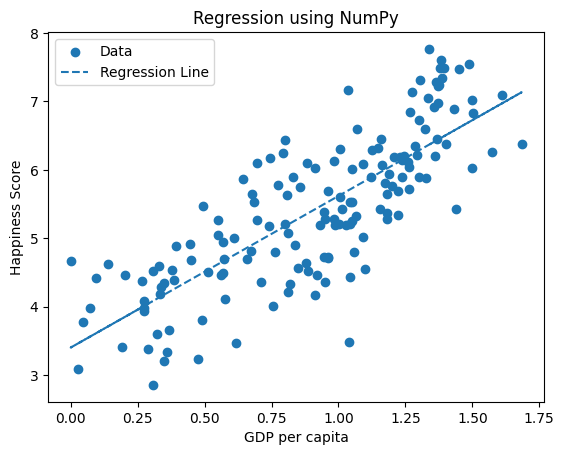

In [3]:

# Simple linear regression: Happiness Score vs GDP per capita
x = df["GDP per capita"].values
y = df["Score"].values

# Fit line using NumPy polyfit (degree 1)
m, b = np.polyfit(x, y, 1)

print("Slope:", m)
print("Intercept:", b)

# Predict
y_pred = m * x + b

# Plot
plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, label="Regression Line", linestyle="--")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Regression using NumPy")
plt.legend()
plt.show()


- A **donut chart** of the top 5 happiest countries – who’s sitting at the top of the happiness leaderboard?


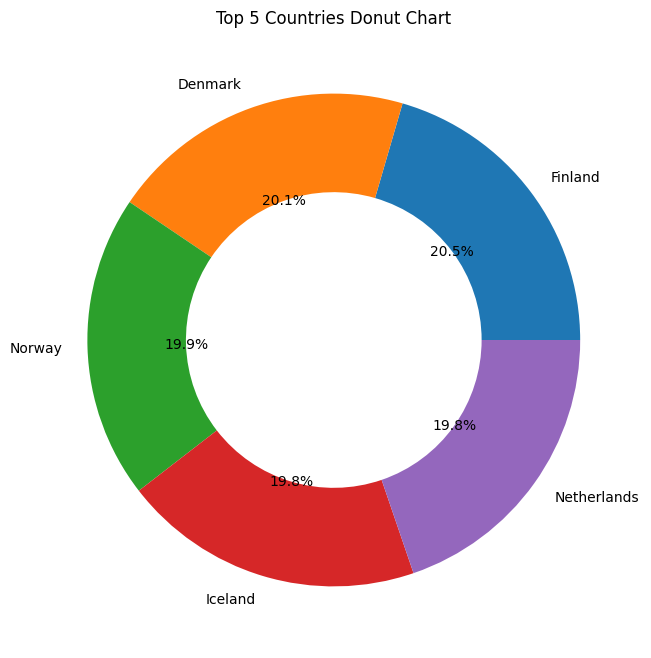

In [4]:

top5=df.nlargest(5,"Score")

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    top5["Score"],
    labels=top5["Country or region"],
    autopct="%1.1f%%",
    wedgeprops=dict(width=0.4)
)
plt.title("Top 5 Countries Donut Chart")
plt.show()


## Conclusion ✅

- **Happiness scores**: They’re not evenly spread — some countries cluster at the top with high scores, while others trail behind.
- **Top 5 happiest countries**: A small group of countries grabs a big slice of the happiness “donut”, reminding us that conditions vary a lot around the world.
- **GDP per capita vs happiness**: The regression line showed that *richer countries do tend to be happier*, at least in this dataset.

### So what does this mean? 😄

- Money *helps*, especially when it lifts people out of poverty and improves life conditions.
- But it’s not everything — factors like *social support, health, freedom, and trust* are likely doing a lot of work in the background too.
